VISUALIZACION

In [70]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('sf1.csv')
df

,Unnamed: 0,title,guest_favorite,rating,number_reviews,type_host,hosting_time,price,all_reviews,complete_data_list
0,0,Vintage Modern Victorian Apartment,True,Rated 4.98 out of 5 stars.\r\n4.98,299,4 guests,Superhost · 11 years hosting,€ 224,"[""Ben's offers modern touches in a historic Vi...",['4 guests · 1 bedroom · 2 beds · 1 bath']
1,1,Cozy Bedroom in Bernal Heights,True,Rated 5.0 out of 5 stars.\r\n5.0,18,2 beds,Superhost · 9 years hosting,€ 197,['Had a great time in SF. Bernal Heights is be...,['2 beds · Shared bathroom']
2,2,Renovated Home in San Francisco,True,Rated 4.88 out of 5 stars.\r\n4.88,60,6 guests,Superhost · 10 months hosting,€ 314,['We loved staying at Kenny’s house. He provid...,['6 guests · 3 bedrooms · 3 beds · 2 baths']
3,3,Ocean Beach Guest Suite,True,Rated 4.96 out of 5 stars.\r\n4.96,205,2 guests,Superhost · 7 years hosting,€ 320,['Great location and great communication with ...,['2 guests · 1 bedroom · 1 bed · 1 bath']
4,4,"Clean, quiet and centrally located - 2 bedrooms",True,Rated 5.0 out of 5 stars.\r\n5.0,36,2 bedrooms,Superhost · 12 years hosting,€ 201,['The house is very well equipped and comforta...,['2 bedrooms · 2 queen beds · Shared bathroom']
...,...,...,...,...,...,...,...,...,...,...
163,163,Charming Garden-Apartment near Dolores Park,True,Rated 4.90 out of 5 stars.\r\n4.90,145,2 guests,Superhost · 12 years hosting,€ 145,['This place was amazing! So close to public t...,['2 guests · 1 bedroom · 1 bed · 1 bath']
164,164,SF Amazing View & SUNroom: Spacious Private 1 ...,True,Rated 4.96 out of 5 stars.\r\n4.96,73,3 guests,Superhost · 1 year hosting,€ 248,['Joy place was wonderful very nice place to s...,['3 guests · 1 bedroom · 1 bed · 1 bath']
165,165,Luxury garden suite at Ocean Beach and Golden ...,True,Rated 4.99 out of 5 stars.\r\n4.99,272,2 guests,Superhost · 6 years hosting,€ 327,['Great place and lovely garden. Terrific loca...,['2 guests · 1 bedroom · 1 bed · 1 bath']
166,166,#1 SF 24th ave& kirkham st Master king room,True,Rated 4.93 out of 5 stars.\r\n4.93,103,2 beds,Superhost · 5 years hosting,€ 244,['Everything was very clean! There was a super...,['2 beds · Private attached bathroom']


In [71]:
#df['rating'].str.extract(r'(\d\.\d{1,2})$').astype(float)
df['guest_favorite'].astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
163    1
164    1
165    1
166    1
167    1
Name: guest_favorite, Length: 168, dtype: int64

In [72]:
import re

def con_a_meses(hosting_time):
    # Buscar "years" y convertir a meses
    years_match = re.search(r'(\d+)\s+years', hosting_time)
    if years_match:
        years = int(years_match.group(1))
        return years * 12
    
    years_match = re.search(r'(\d+)\s+year', hosting_time)
    if years_match:
        years = int(years_match.group(1))
        return years * 12
    
    # Buscar "months" y dejar en meses
    months_match = re.search(r'(\d+)\s+months', hosting_time)
    if months_match:
        months = int(months_match.group(1))
        return months
    
    # Buscar "days" y convertir a meses (aprox. 30 días = 1 mes)
    days_match = re.search(r'(\d+)\s+days', hosting_time)
    if days_match:
        days = int(days_match.group(1))
        return days / 30  # Convertir días a meses
    
    return 0  # Si no hay coincidencia, devolver 0 meses

def limpiezadedatos(df):
    # Limpiar la columna rating: extraer los últimos 4 dígitos y convertir a float
    df['rating'] = df['rating'].str.extract(r'(\d\.\d{1,2})$').astype(float)

    # Convertir number_reviews a float
    df['number_reviews'] = pd.to_numeric(df['number_reviews'], errors='coerce')

    # Limpiar la columna price: eliminar símbolos y convertir a float
    df['price'] = df['price'].replace({'[€,$]': '', ',': ''}, regex=True).astype(float)

    # Guardar el dataframe limpio en un nuevo CSV
    df.to_csv('proyectoairbnblimpio.csv', index=False)
    
    # Convertimos a meses 
    df['hosting_time'] = df['hosting_time'].apply(con_a_meses)

    # Convertimos los true y false
    df['guest_favorite'] = df['guest_favorite'].astype(int)

    return df


df_limpio = limpiezadedatos(df)


In [73]:
df

,Unnamed: 0,title,guest_favorite,rating,number_reviews,type_host,hosting_time,price,all_reviews,complete_data_list
0,0,Vintage Modern Victorian Apartment,1,4.98,299.0,4 guests,132,224.0,"[""Ben's offers modern touches in a historic Vi...",['4 guests · 1 bedroom · 2 beds · 1 bath']
1,1,Cozy Bedroom in Bernal Heights,1,5.00,18.0,2 beds,108,197.0,['Had a great time in SF. Bernal Heights is be...,['2 beds · Shared bathroom']
2,2,Renovated Home in San Francisco,1,4.88,60.0,6 guests,10,314.0,['We loved staying at Kenny’s house. He provid...,['6 guests · 3 bedrooms · 3 beds · 2 baths']
3,3,Ocean Beach Guest Suite,1,4.96,205.0,2 guests,84,320.0,['Great location and great communication with ...,['2 guests · 1 bedroom · 1 bed · 1 bath']
4,4,"Clean, quiet and centrally located - 2 bedrooms",1,5.00,36.0,2 bedrooms,144,201.0,['The house is very well equipped and comforta...,['2 bedrooms · 2 queen beds · Shared bathroom']
...,...,...,...,...,...,...,...,...,...,...
163,163,Charming Garden-Apartment near Dolores Park,1,4.90,145.0,2 guests,144,145.0,['This place was amazing! So close to public t...,['2 guests · 1 bedroom · 1 bed · 1 bath']
164,164,SF Amazing View & SUNroom: Spacious Private 1 ...,1,4.96,73.0,3 guests,12,248.0,['Joy place was wonderful very nice place to s...,['3 guests · 1 bedroom · 1 bed · 1 bath']
165,165,Luxury garden suite at Ocean Beach and Golden ...,1,4.99,272.0,2 guests,72,327.0,['Great place and lovely garden. Terrific loca...,['2 guests · 1 bedroom · 1 bed · 1 bath']
166,166,#1 SF 24th ave& kirkham st Master king room,1,4.93,103.0,2 beds,60,244.0,['Everything was very clean! There was a super...,['2 beds · Private attached bathroom']


In [74]:

#df['rating_cleaned'].isna().sum()
#df['number_reviews_cleaned'].isna().sum()
#df['price_cleaned'].isna().sum()

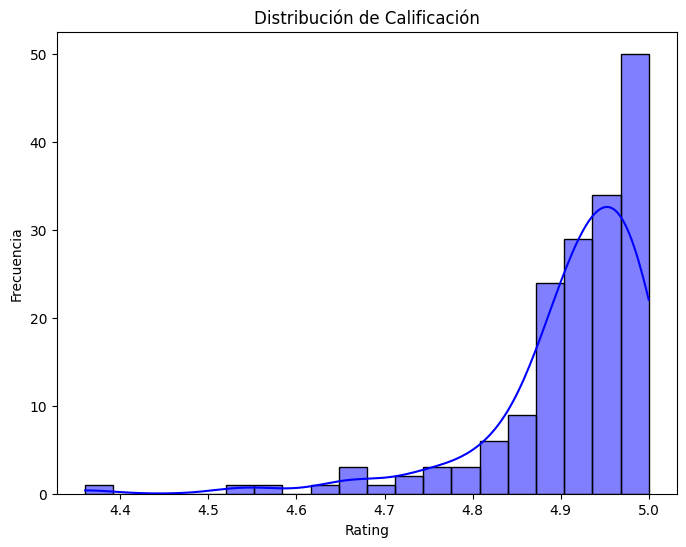

In [75]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], kde=True, bins=20, color='blue')
plt.title('Distribución de Calificación')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

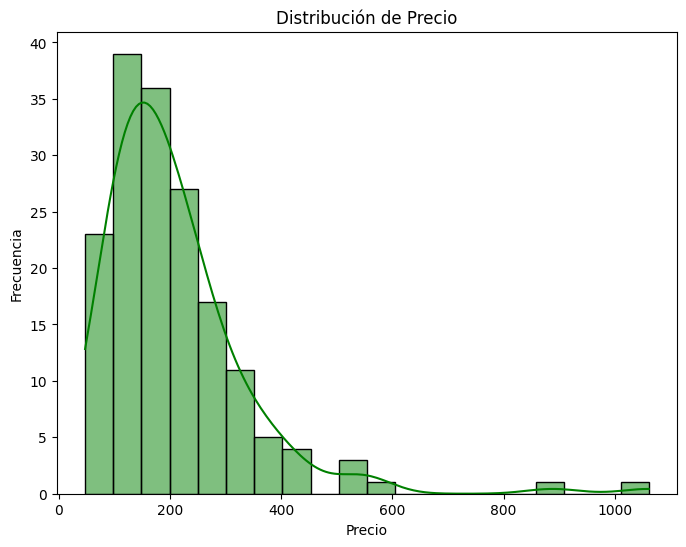

In [76]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=20, color='green')
plt.title('Distribución de Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

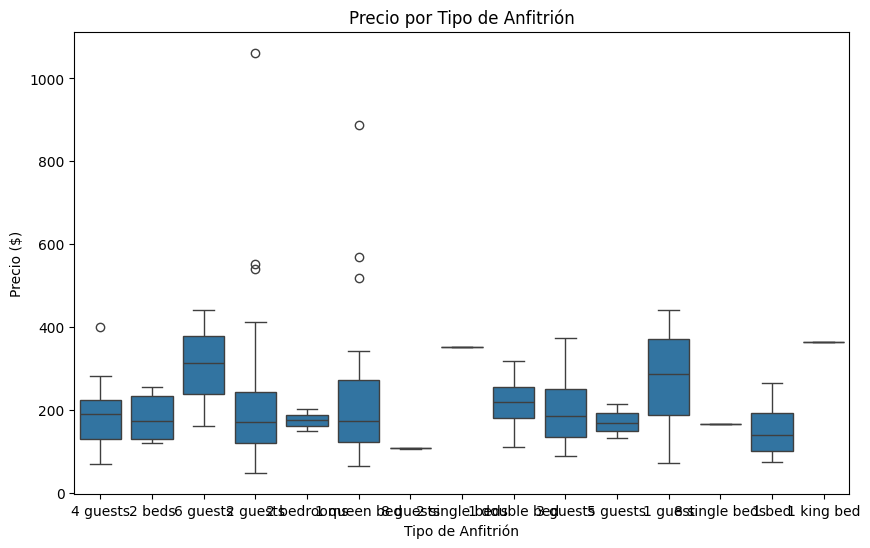

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_host', y='price', data=df)
plt.title('Precio por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Precio ($)')
plt.show()

C:\Users\stehu\AppData\Local\Temp\ipykernel_14180\1472098418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type_host', y='rating', data=df, palette="muted")


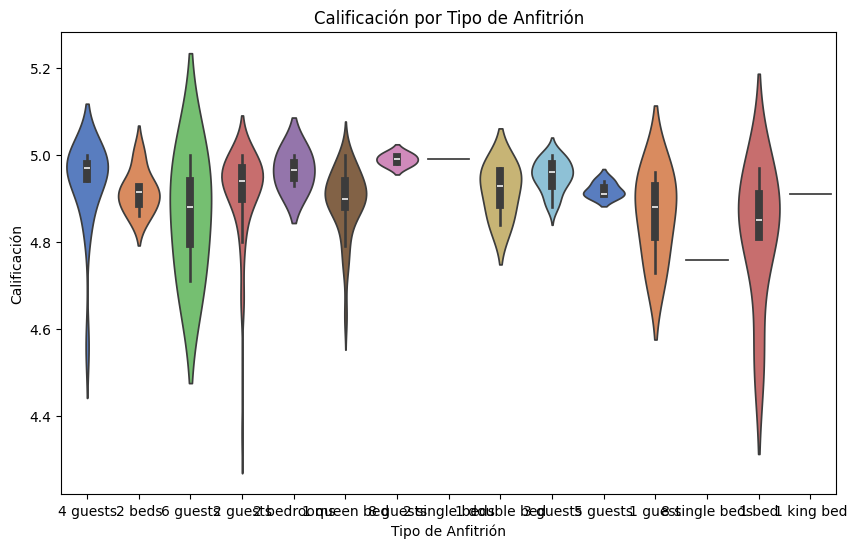

In [78]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='type_host', y='rating', data=df, palette="muted")
plt.title('Calificación por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Calificación')
plt.show()

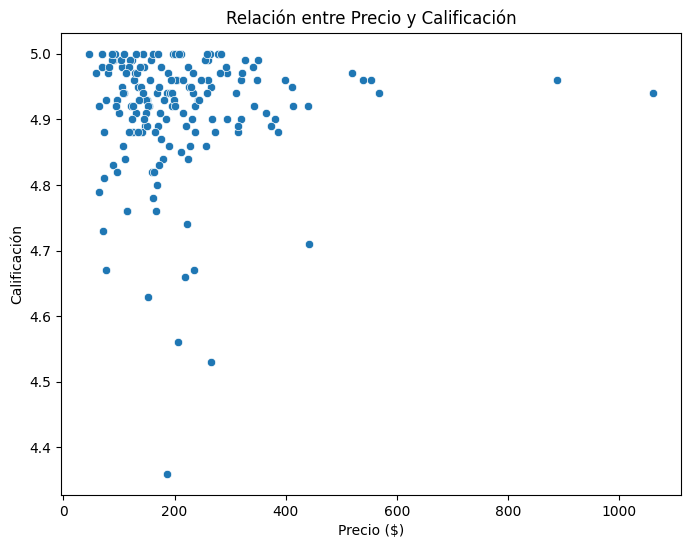

In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='rating', data=df)
plt.title('Relación entre Precio y Calificación')
plt.xlabel('Precio ($)')
plt.ylabel('Calificación')
plt.show()


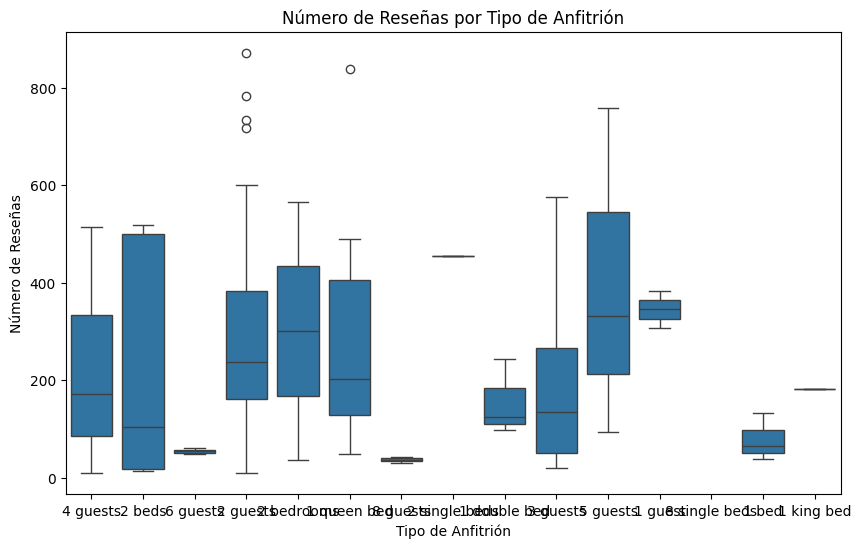

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_host', y='number_reviews', data=df)
plt.title('Número de Reseñas por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Número de Reseñas')
plt.show()


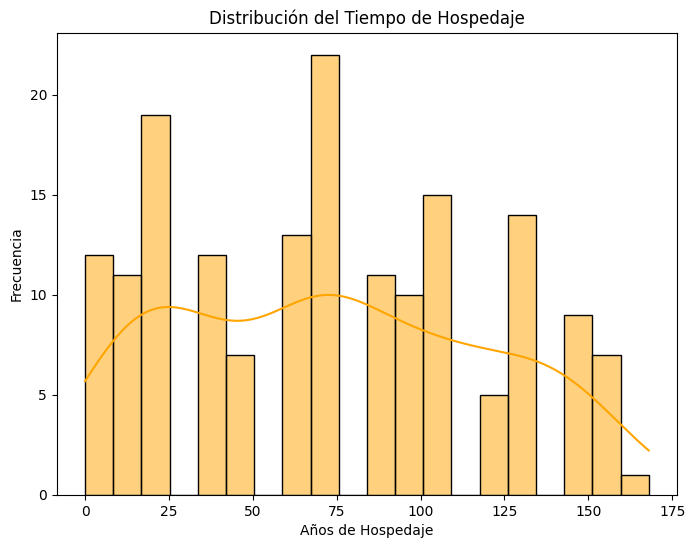

In [81]:
plt.figure(figsize=(8, 6))
sns.histplot(df['hosting_time'], kde=True, bins=20, color='orange')
plt.title('Distribución del Tiempo de Hospedaje')
plt.xlabel('Años de Hospedaje')
plt.ylabel('Frecuencia')
plt.show()


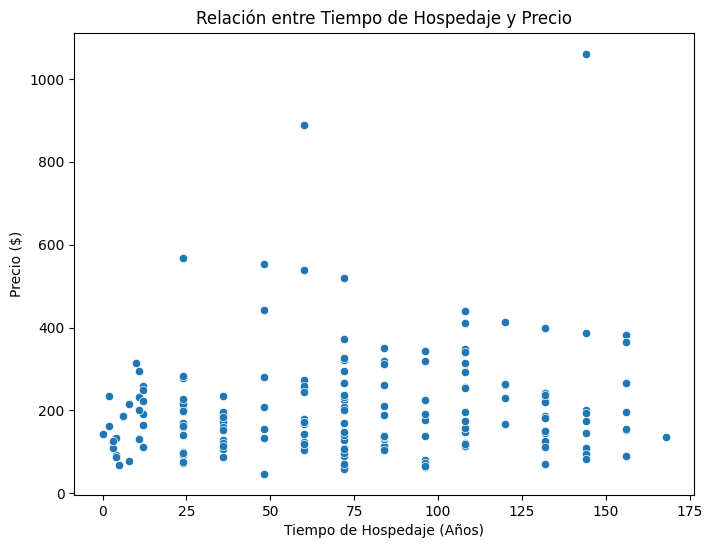

In [82]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hosting_time', y='price', data=df)
plt.title('Relación entre Tiempo de Hospedaje y Precio')
plt.xlabel('Tiempo de Hospedaje (Años)')
plt.ylabel('Precio ($)')
plt.show()


C:\Users\stehu\AppData\Local\Temp\ipykernel_14180\1472098418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type_host', y='rating', data=df, palette="muted")


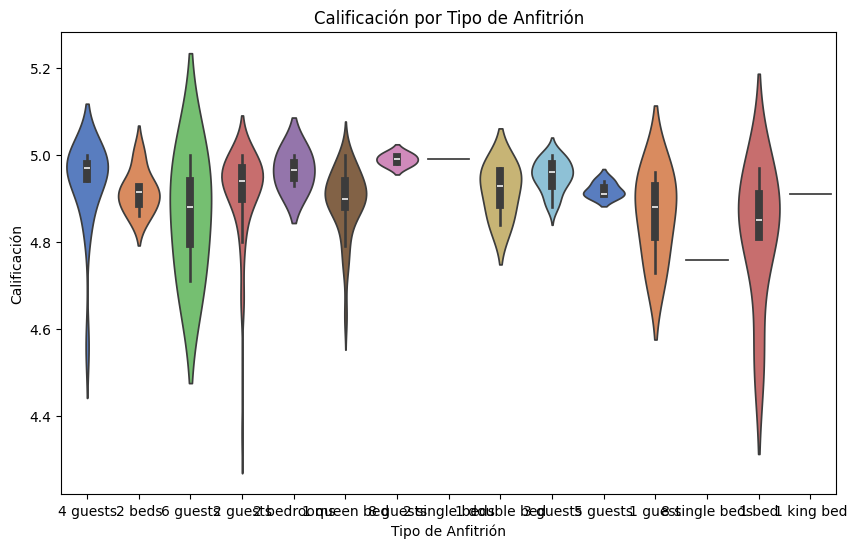

In [83]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='type_host', y='rating', data=df, palette="muted")
plt.title('Calificación por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Calificación')
plt.show()

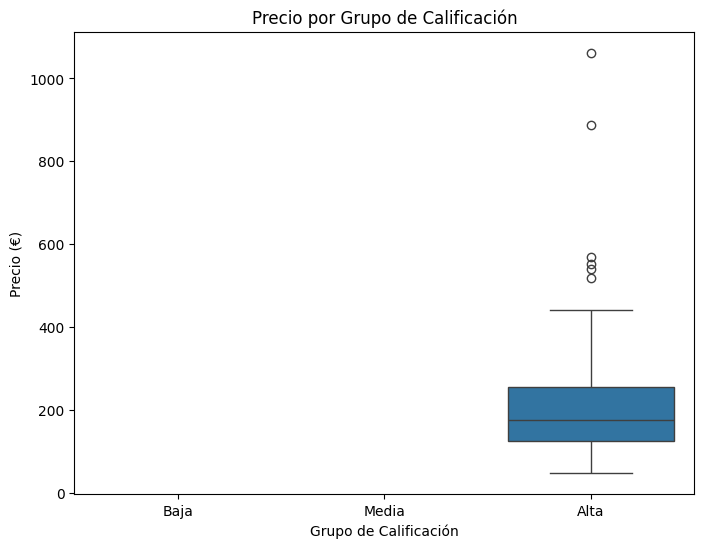

In [84]:
# Paso 1: Eliminar filas donde el valor de 'rating' es "reviews" o es NaN
df_cleaned = df[df['rating'] != 'reviews']  # Eliminar 'reviews'
df_cleaned['rating'] = pd.to_numeric(df_cleaned['rating'], errors='coerce')  # Convertir a numérico
df_cleaned = df_cleaned.dropna(subset=['rating', 'price'])  # Eliminar NaN

# Paso 2: Crear grupos de calificación
df_cleaned['rating_group'] = pd.cut(df_cleaned['rating'], bins=[0, 3, 4, 5], labels=['Baja', 'Media', 'Alta'])

# Paso 3: Graficar el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating_group', y='price', data=df_cleaned)
plt.title('Precio por Grupo de Calificación')
plt.xlabel('Grupo de Calificación')
plt.ylabel('Precio (€)')
plt.show()



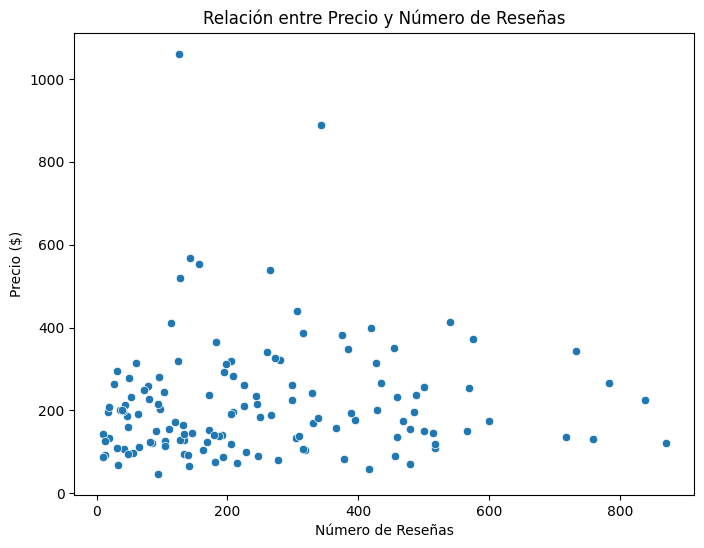

In [85]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='number_reviews', y='price', data=df)
plt.title('Relación entre Precio y Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio ($)')
plt.show()


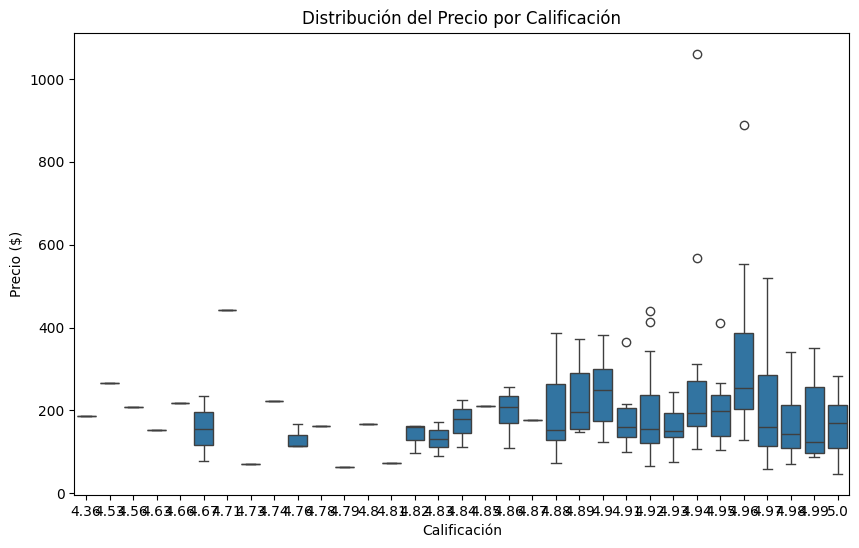

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='price', data=df)
plt.title('Distribución del Precio por Calificación')
plt.xlabel('Calificación')
plt.ylabel('Precio ($)')
plt.show()


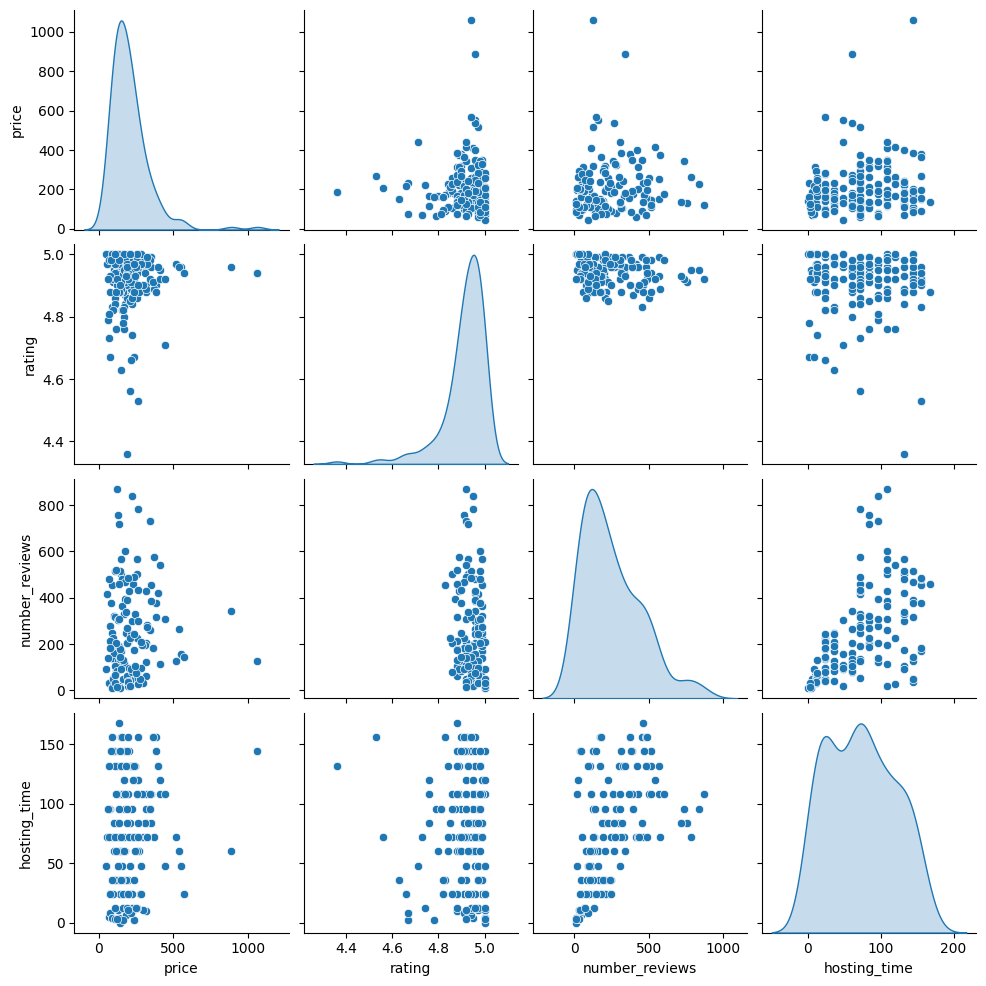

In [87]:
sns.pairplot(df[['price', 'rating', 'number_reviews', 'hosting_time']], diag_kind='kde')
plt.show()


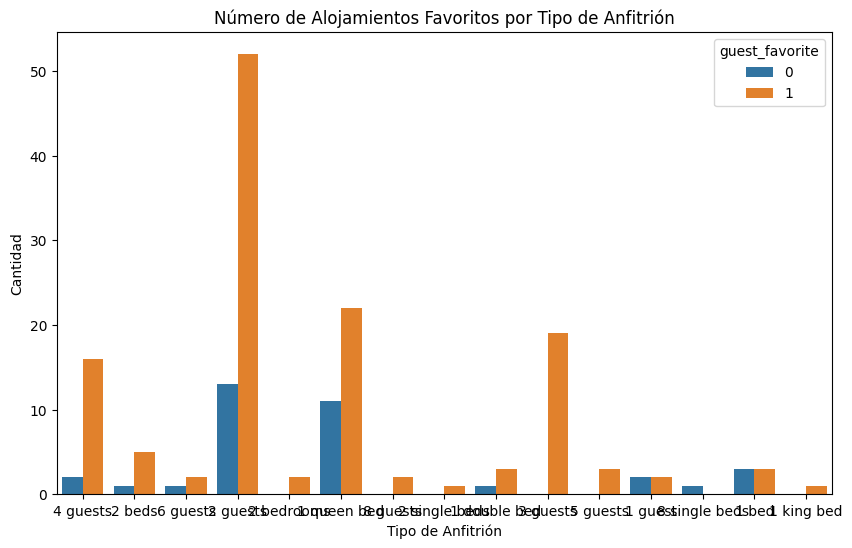

In [88]:


plt.figure(figsize=(10, 6))
sns.countplot(x='type_host', hue='guest_favorite', data=df)
plt.title('Número de Alojamientos Favoritos por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Cantidad')
plt.show()


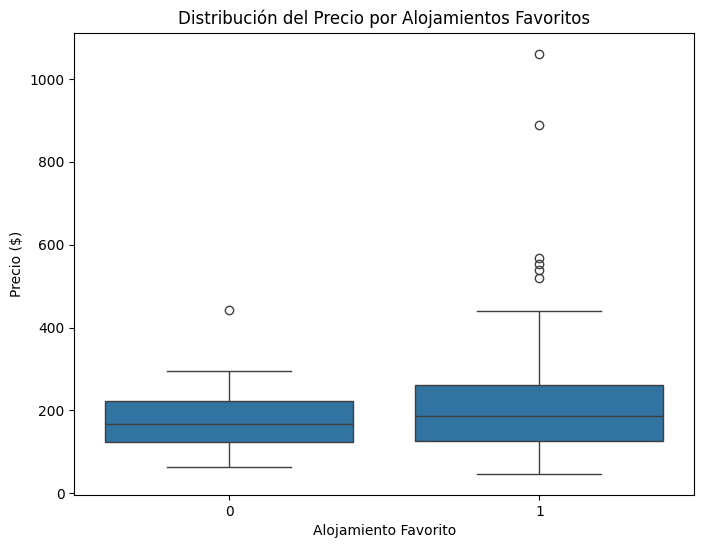

In [89]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='guest_favorite', y='price', data=df)
plt.title('Distribución del Precio por Alojamientos Favoritos')
plt.xlabel('Alojamiento Favorito')
plt.ylabel('Precio ($)')
plt.show()


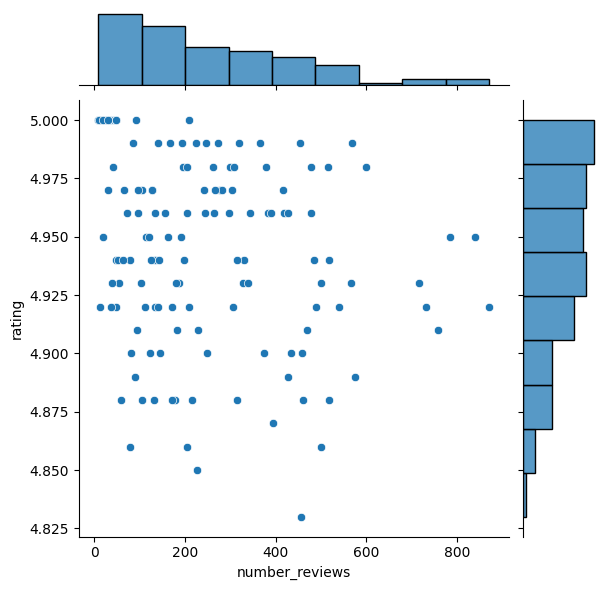

In [90]:
# Filtrar las filas donde 'rating' y 'number_reviews' no contengan 'reviews'
df_cleaned = df[(df['rating'] != 'reviews') & (df['number_reviews'] != 'reviews')].copy()

# Convertir las columnas 'rating' y 'number_reviews' a numérico
df_cleaned['rating'] = pd.to_numeric(df_cleaned['rating'], errors='coerce')
df_cleaned['number_reviews'] = pd.to_numeric(df_cleaned['number_reviews'], errors='coerce')

# Eliminar filas con NaN en 'rating' o 'number_reviews'
df_cleaned = df_cleaned.dropna(subset=['rating', 'number_reviews'])

# Generar el gráfico conjunto (jointplot)
sns.jointplot(x='number_reviews', y='rating', data=df_cleaned, kind='scatter')

# Mostrar el gráfico
plt.show()


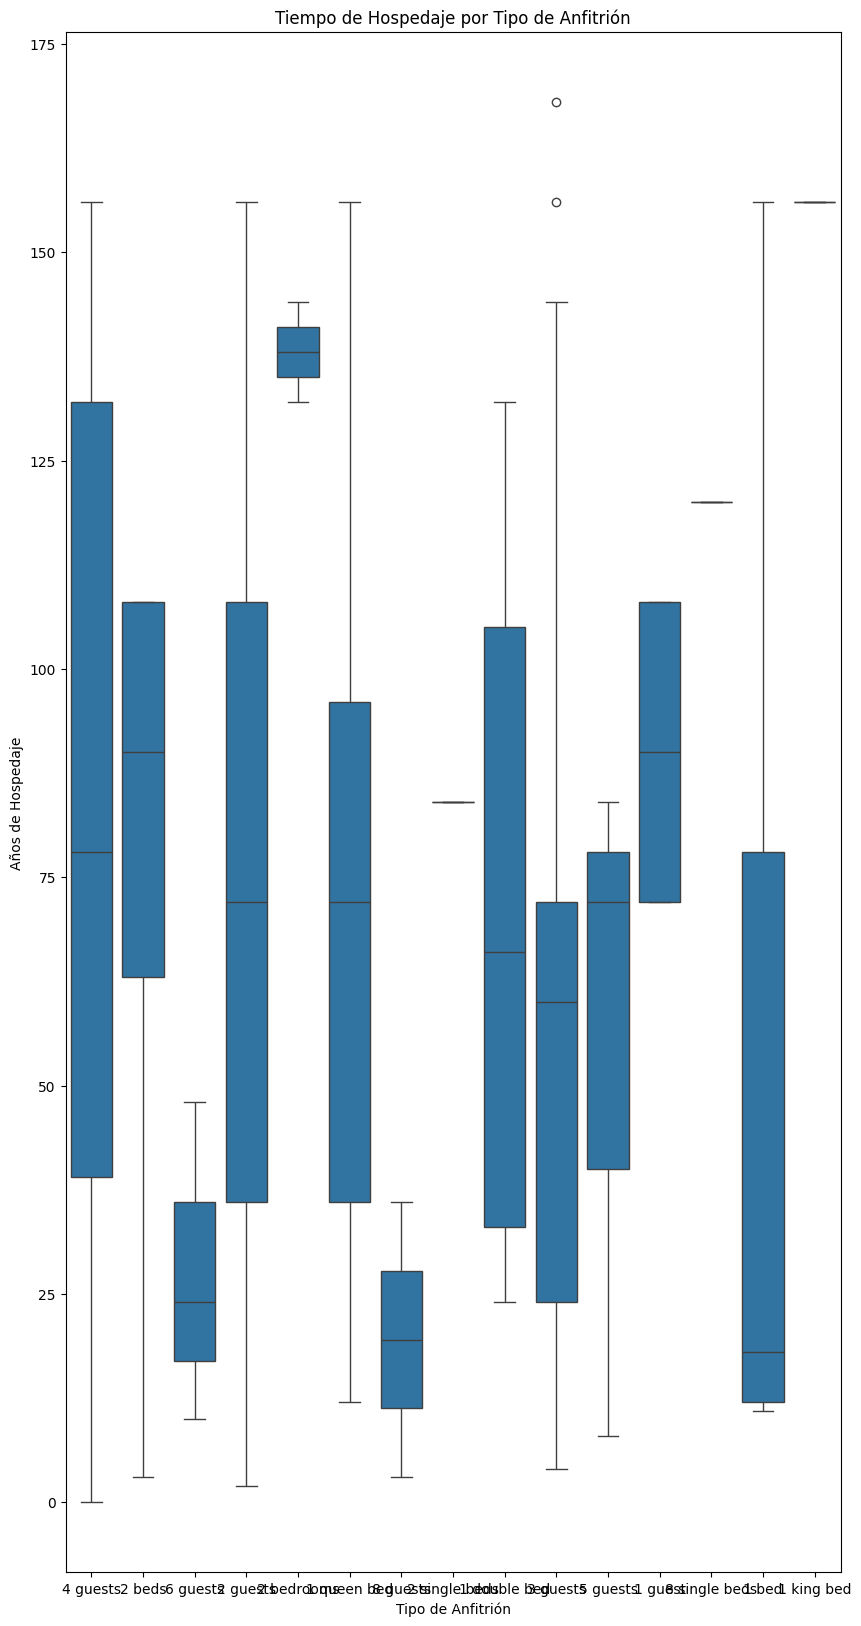

In [91]:
plt.figure(figsize=(10, 20))
sns.boxplot(x='type_host', y=df['hosting_time'], data=df)
plt.title('Tiempo de Hospedaje por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Años de Hospedaje')
plt.show()


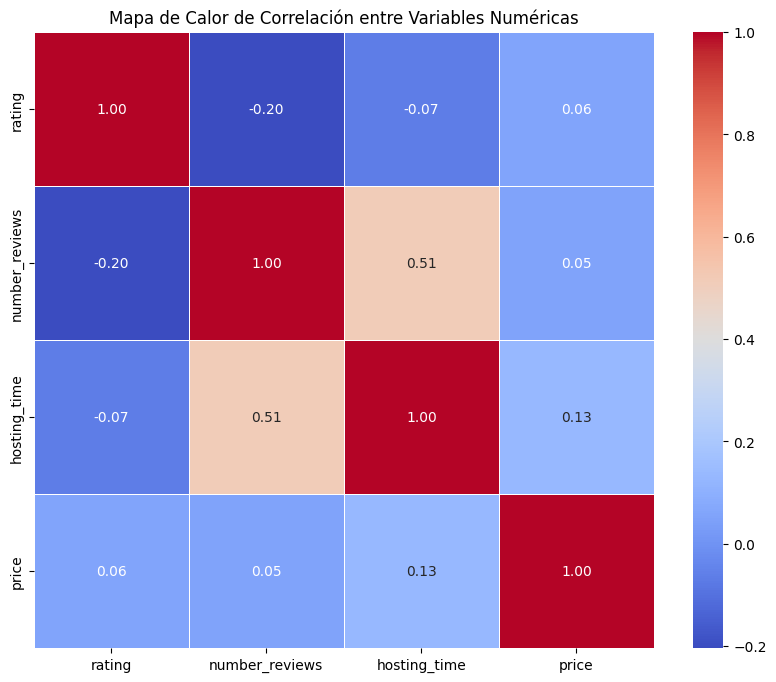

In [92]:
# Seleccionar las columnas numéricas para el análisis de correlación
numeric_cols = ['rating', 'number_reviews', 'hosting_time', 'price']

# Calcular la matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Título del mapa de calor
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')

# Mostrar el gráfico
plt.show()
